**Introduction**

Text is one of the most widespread forms of sequence data. It can be understood as either a sequence of charactors or a sequence of words, but it's most common to work at level of words. Text-sequence processing includes following applications:

**Applications of deep learning for text data:**

- Document classification
- Articles lebelling
- Sentiment analysis
- Author identification
- Question-answering
- Language detection
- Translation Tasks

- In true sense deep learning models map the statistical structure of written language, which is sufficient to solve many simple textual tasks and problems.
- Deep learning for natural-language processing is pattern recognition applied to words, sequence, and paragraphs, in much similar way that computer vision is pattern recognition applied to pixels.
- Deep-learning models don't take input as text like other models they only work with numeric tensors

**Three techniques to vectorize the text data:**

1. Segment text into words, and convert word into a vector
2. Segment text into charactors, and transform each chractors into a vector.
3. Extract n-grams of words, and transform each n-grams into a vector.
- There are many ways one can convert text to vector and it depends on what models one is using along with time or resources utilization.

**Typical workflow to prepare text data for machine learning models:**

1. Tokenization
2. One-Hot encoding or word indexing
3. Pad sequencing
4. Embedding layer (Word2Vec)
5. Corresponding word vector

- In this notebook, we are going to explore and solve news classification problem to classify 41 types of news headlines and news descriptions.
**Use-case:** Such text classification models are used in News Apps or by reporter to classify news topics for better reach to right audience.

**Problem-statement:** Build news classification model using deep learning teechniques and deploy model for reporters to classify and label news articles.

Reference: Deep learning with python by Francois Chollet

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import nltk
import pandas_profiling as pp
from markupsafe import escape
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split, cross_val_score
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# model building imports
from keras.layers import Embedding, Flatten, Dense, Dropout
from keras.layers import Conv1D, SimpleRNN, Bidirectional, MaxPooling1D, GlobalMaxPool1D, LSTM, GRU
from keras.models import Sequential
from keras.regularizers import L1L2

%matplotlib inline

# matplotlib defaults
plt.style.use("ggplot")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

import warnings 
warnings.filterwarnings('ignore')
nltk.download('omw-1.4')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

C:\Users\Neeta Devke\AppData\Local\Temp\ipykernel_3048\1489620471.py:8: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp
[nltk_data] Downloading package omw-1.4 to C:\Users\Neeta
[nltk_data]     Devke\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


**DATA EXPLORATORY AND PREPROCESSING**

In [3]:
df = pd.read_json("D:\\Downloads\\archive (1)\\News_Category_Dataset_v3.json", lines = True)

In [4]:
df.head()

link  \
0  https://www.huffpost.com/entry/covid-boosters-...   
1  https://www.huffpost.com/entry/american-airlin...   
2  https://www.huffpost.com/entry/funniest-tweets...   
3  https://www.huffpost.com/entry/funniest-parent...   
4  https://www.huffpost.com/entry/amy-cooper-lose...   

                                            headline   category  \
0  Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1  American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2  23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3  The Funniest Tweets From Parents This Week (Se...  PARENTING   
4  Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   

                                   short_description               authors  \
0  Health experts said it is too early to predict...  Carla K. Johnson, AP   
1  He was subdued by passengers and crew when he ...        Mary Papenfuss   
2  "Until you have a dog you don't understand wha...         Elyse Wanshel   
3  "Accidentally put grown-up toothpaste on my to...      Caroline Bologna   
4  Amy Cooper accused investment firm Franklin Te...        Nina Golgowski   

        date  
0 2022-09-23  
1 2022-09-23  
2 2022-09-23  
3 2022-09-23  
4 2022-09-22

**SHAPE OF DATASET**

In [5]:
df.shape

(209527, 6)

**TOTAL NUMBER OF UNIQUE CATEGORIES**

In [6]:
print(f"Unique Categories: {df['category'].nunique()}")

Unique Categories: 42


**INFORMATION ABOUT METADATA**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


**GENERAL DESCRPTION OF DATASET**

In [8]:
df.describe().style.set_properties(**{'background-color': '#F0F0F0',
                                    'color': '#222222',
                                    'border': '1.5px  solid black'})

**Profiling report of dataset**

In [19]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Key findings:**

1. Dataset has total **41** distinct categories of news articles
2. **'Politics'** is the most common category of news in our dataset.
3. We have total of **27993** unique authors who have written various news articles
4. Maximum length of headline is **320** while median length is around **59**.
5. Maximum length of description is **1472** while median length is around **120**.

**Text data visualization**

*Drop columns like authors, links and date as they are irrelevent to our problem.*

In [9]:
new_df = df.drop(columns=['authors','link','date'])
new_df.head()

headline   category  \
0  Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1  American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2  23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3  The Funniest Tweets From Parents This Week (Se...  PARENTING   
4  Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   

                                   short_description  
0  Health experts said it is too early to predict...  
1  He was subdued by passengers and crew when he ...  
2  "Until you have a dog you don't understand wha...  
3  "Accidentally put grown-up toothpaste on my to...  
4  Amy Cooper accused investment firm Franklin Te...

**TOP 10 Categories of News Articles**

In [10]:
# Top categories by and number of articles per categories
cat_df = pd.DataFrame(new_df['category'].value_counts()).reset_index()
cat_df.rename(columns={'index':'news_classes','category':'numcat'}, inplace=True)

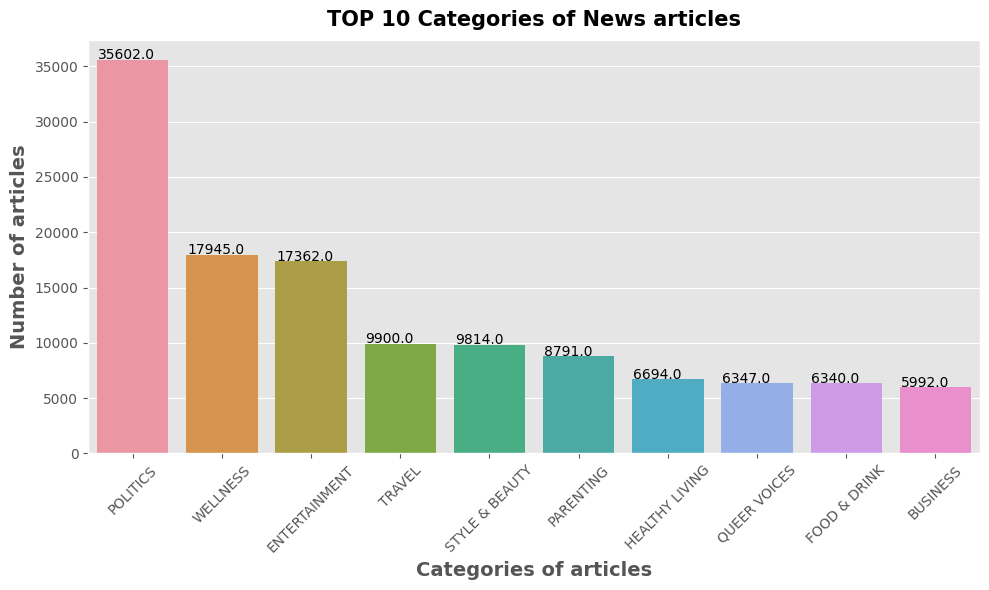

In [22]:
# Visualize top 10 categories and proportion of each categories in dataset
plt.figure(figsize=(10,6))
ax = sns.barplot(x = np.array(cat_df.news_classes)[:10], y= (np.array(cat_df.numcat)[:10]))
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.01, p.get_height() + 50))
plt.title("TOP 10 Categories of News articles", size=15)
plt.xlabel("Categories of articles", size=14)
plt.xticks(rotation=45)
plt.ylabel("Number of articles", size=14)
plt.show()

*plot the pie chart of top 20 categories of news articles*

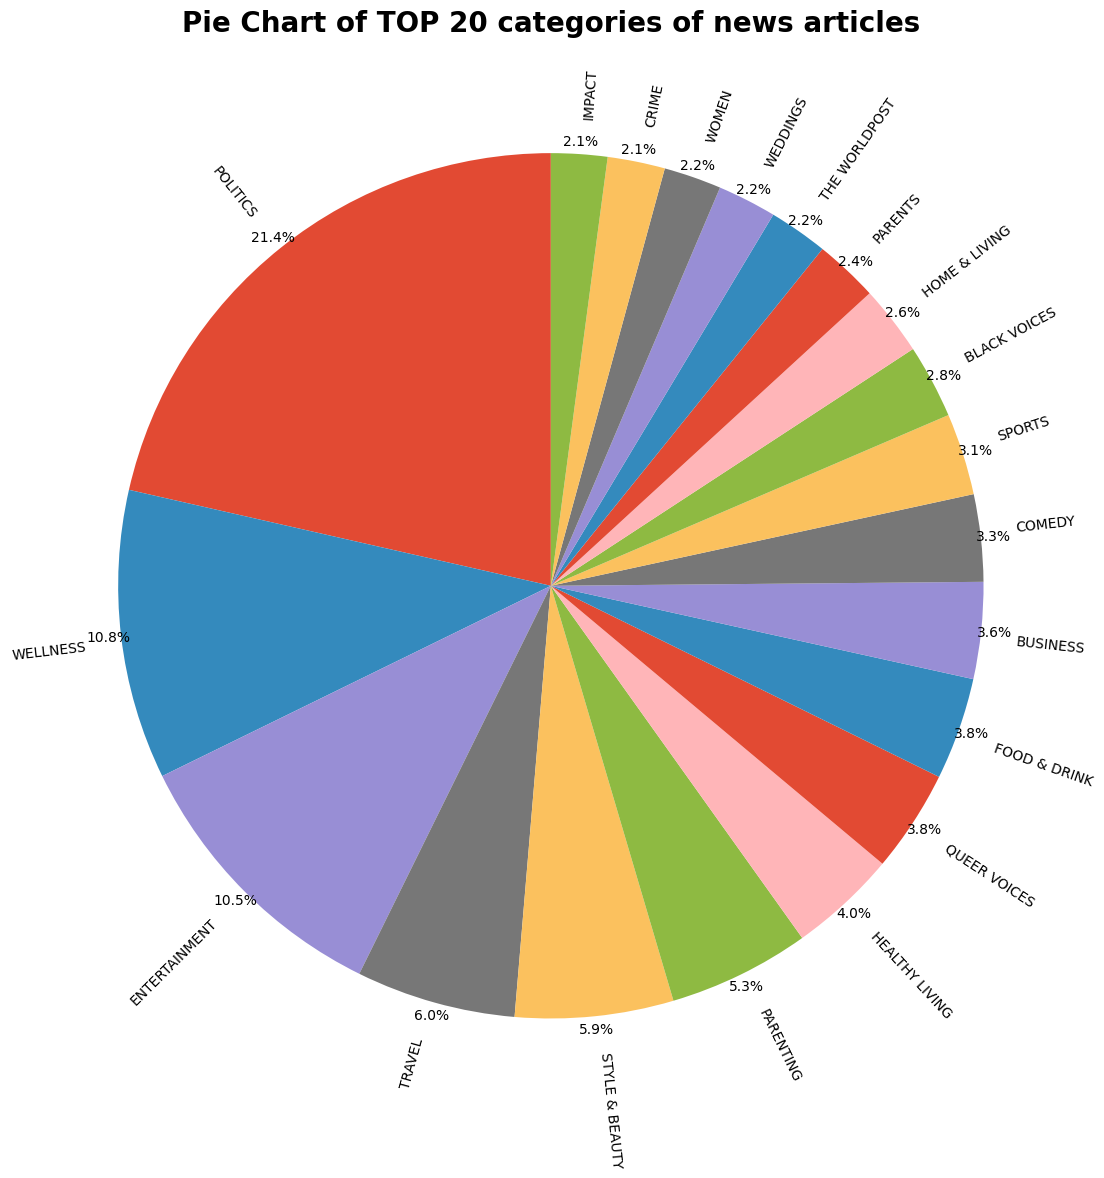

In [23]:
fig = plt.figure(figsize=(12,12))
A = plt.pie(cat_df['numcat'][:20],
            labels=cat_df['news_classes'][:20],
            autopct='%1.1f%%',
            startangle=90,
            labeldistance=1.08,
            pctdistance=1.03,
            rotatelabels=45
            )

plt.title("Pie Chart of TOP 20 categories of news articles", size=20, weight='bold')
plt.show()

**Lengths of 'headline' and 'short_description' of each category**

*create final dataframe of combined headline and short_description*

In [11]:
final_df = new_df.copy()
final_df['length_of_news'] = final_df['headline'] + final_df['short_description']
final_df.drop(['headline','short_description'], inplace=True, axis=1)
final_df['len_news'] = final_df['length_of_news'].map(lambda x: len(x))
final_df.head()

category                                     length_of_news  len_news
0  U.S. NEWS  Over 4 Million Americans Roll Up Sleeves For O...       230
1  U.S. NEWS  American Airlines Flyer Charged, Banned For Li...       248
2     COMEDY  23 Of The Funniest Tweets About Cats And Dogs ...       133
3  PARENTING  The Funniest Tweets From Parents This Week (Se...       215
4  U.S. NEWS  Woman Who Called Cops On Black Bird-Watcher Lo...       233

*maximum length of news in each category*

In [12]:
lenmax_df = final_df.groupby('category')['len_news'].max().reset_index().sort_values(by='len_news',ascending=False)
lenmax_df.head()

category  len_news
24        POLITICS      1486
41       WORLDPOST      1424
4          COLLEGE      1225
16  HEALTHY LIVING      1073
38        WELLNESS      1036

*minimum lenght of news in each category*

In [13]:
lenmin_df = final_df.groupby('category')['len_news'].min().reset_index().sort_values(by='len_news',ascending=False)
lenmin_df.head()

category  len_news
35      U.S. NEWS        73
8         DIVORCE        66
33  THE WORLDPOST        56
36       WEDDINGS        54
21          MONEY        51

*plot the bar plots of max and min length of news articles*

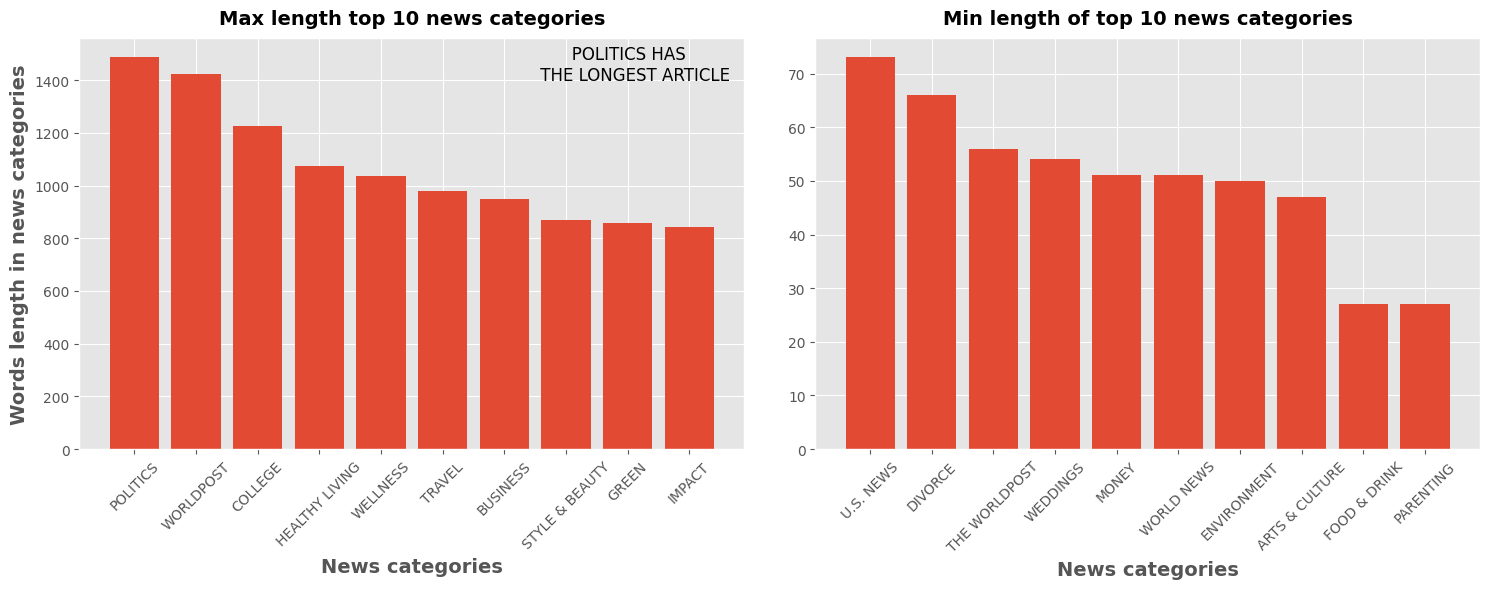

In [27]:
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.bar(lenmax_df['category'][:10],lenmax_df['len_news'][:10])
plt.xticks(rotation=45)
plt.ylabel("Words length in news categories", size=14)
plt.xlabel("News categories",  size=14)
plt.text(6.5,1400, '''       POLITICS HAS 
 THE LONGEST ARTICLE''', fontsize=12)
plt.title("Max length top 10 news categories", size=14)

plt.subplot(122)
plt.bar(lenmin_df['category'][:10], lenmin_df['len_news'][:10])
plt.xticks(rotation=45)
plt.xlabel("News categories", size=14)
plt.title("Min length of top 10 news categories", size=14)

plt.show()

**Key findings:**

1. From all the categories of news **POLITICS** has the **most number of articles** as well as **length of characters** in the article (headlines and short-description)
2. After 'POLITICS' category, 'WORLDPOST', 'COLLEGE', 'HEALTHY LIVING','WELLNESS' categories are in top 5 most length of articles
3. 'POLITICS', 'WELLNESS' and 'ENTERTAINTMENT' are top 3 categories having most number of articles in out dataset.

**Wordclouds of categories and news articles**

- Wordcloud of categories in out dataframe
- Wordcloud of new articles in each of the categories

*wordcloud of categories of news articles in our dataset*

(-0.5, 1599.5, 599.5, -0.5)

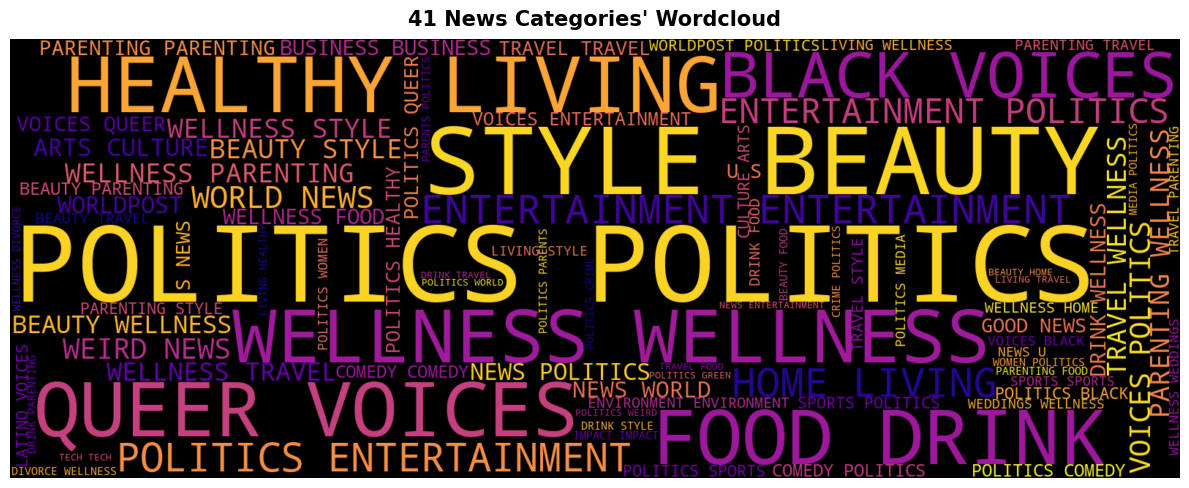

In [28]:
plt.figure(figsize=(12,12))
wc = WordCloud(max_words=1000, 
               min_font_size=10,
               height=600,
               width=1600,
               background_color='black',
               contour_color='black',
               colormap='plasma',
               repeat=False,
               stopwords=STOPWORDS).generate(' '.join(final_df.category))

plt.title("41 News Categories' Wordcloud", size=15, weight='bold')
plt.imshow(wc, interpolation= "bilinear")
plt.axis('off')

*create new dataframe of category and length of each news articles in that categories*

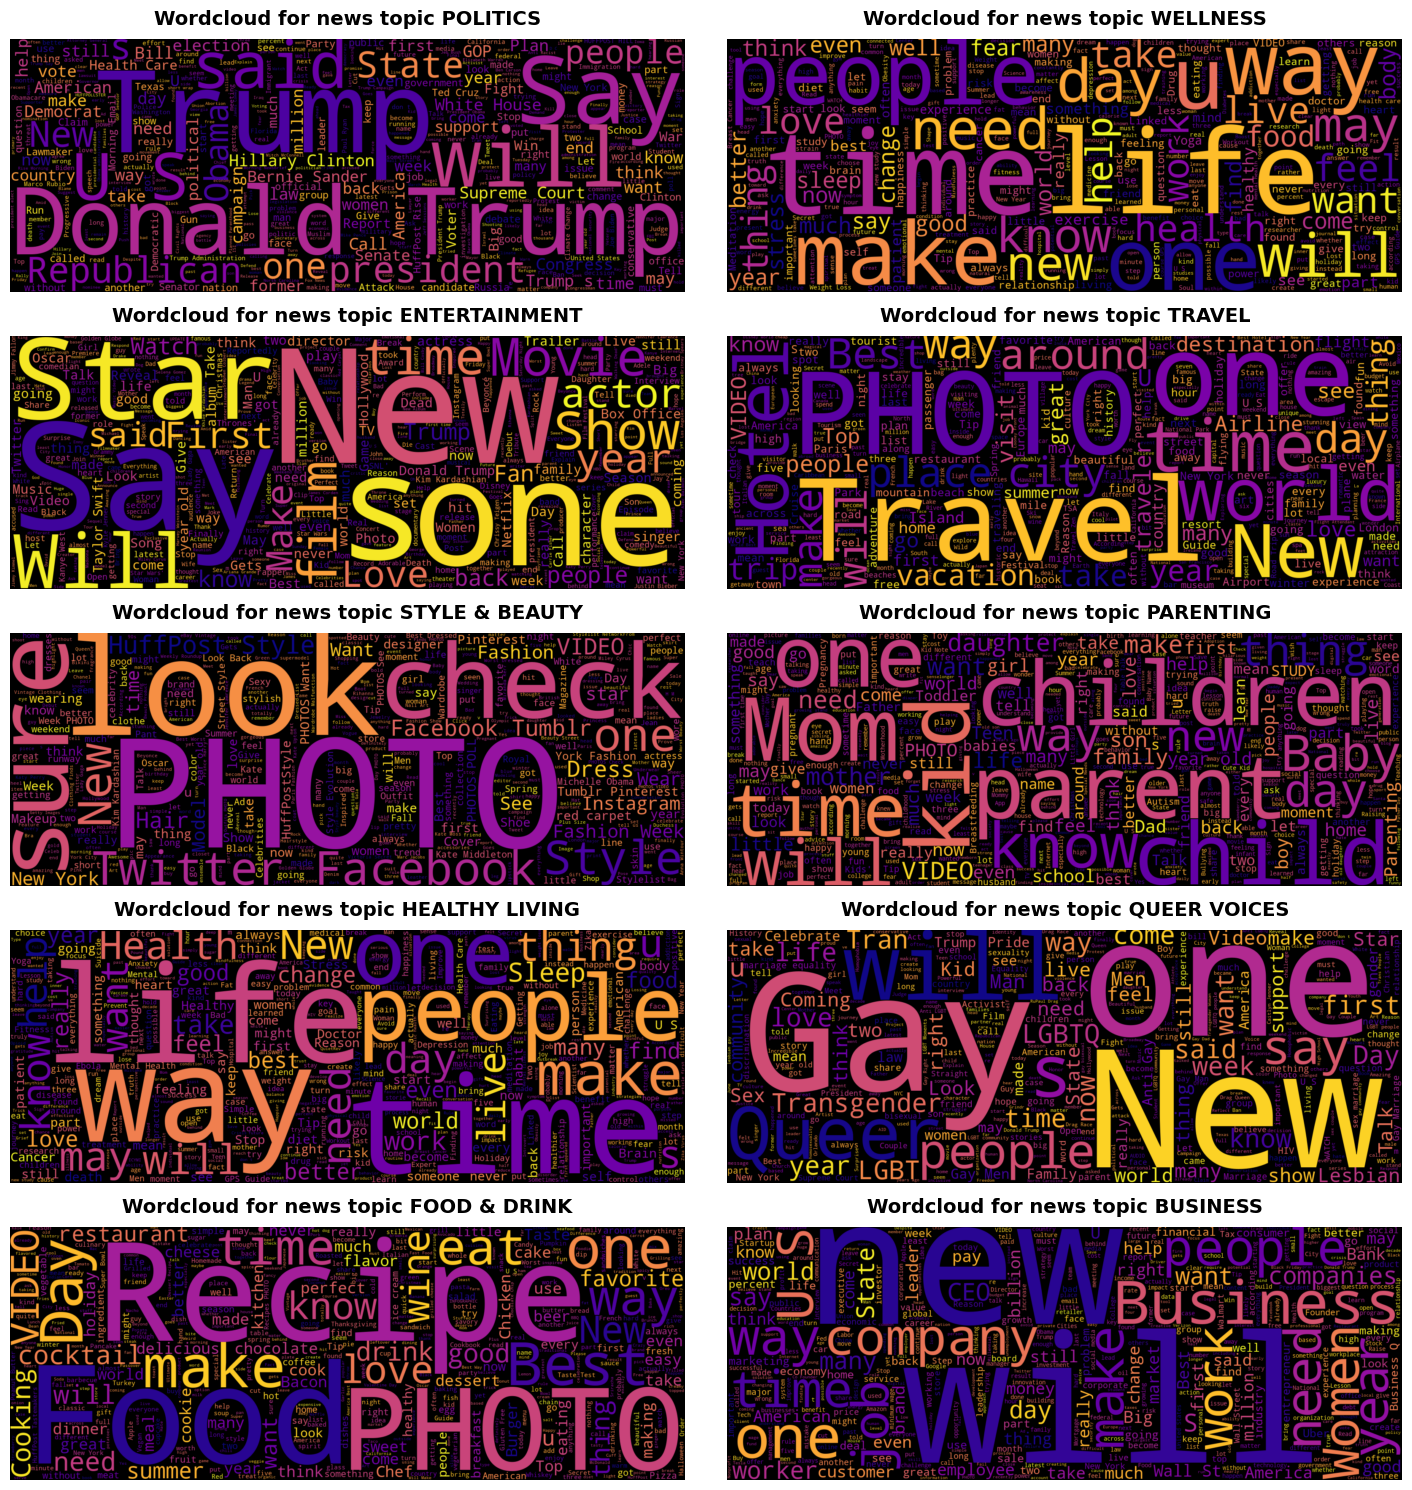

In [15]:
ndf = final_df.copy()
ndf.drop('len_news', inplace=True, axis=1)

# list of top 10  categories in out dataset
categories = cat_df['news_classes'][:10].to_list()

# list of news articles of each top 10 categories list
articles_list = []

for i in categories:
    cat_ndf = ndf[ndf['category'] == i]
    cat_array = cat_ndf['length_of_news'].values  # array of news articles text in each category
    articles_list.append(cat_array)
    
# create a wordcloud instance
wc1 = WordCloud(max_words=1000, 
               min_font_size=10,
               height=600,
               width=1600,
               background_color='black',
               contour_color='black',
               colormap='plasma',
               repeat=True,
               stopwords=STOPWORDS)

# plot the figure of 10 wordcloud from out dataset
plt.figure(figsize=(15,15))

for idx, j in enumerate(categories):
    plt.subplot(5,2,idx+1)
    cloud = wc1.generate(' '.join(articles_list[idx]))
    plt.imshow(cloud, interpolation= "bilinear")
    plt.title(f"Wordcloud for news topic {j}")
    plt.axis('off')

**Text-data Preprocessing**

*start with removing some data from politics dataframe ndf*

In [16]:
politics_list = list(ndf[ndf['category'] == 'POLITICS'].index) 
list_16 = politics_list[:16000] # list of 16000 row labels of POLITICS category

# drop these 16000 labels from the dataset
ndf2 = ndf.copy()
ndf2.drop(list_16, axis=0, inplace=True)

*clean the text data using regex and data cleaning function*

In [33]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to C:\Users\Neeta
[nltk_data]     Devke\AppData\Roaming\nltk_data...


True

In [17]:
def datacleaning(text):
    whitespace = re.compile(r"\s+")
    user = re.compile(r"(?i)@[a-z0-9_]+")
    text = whitespace.sub(' ', text)
    text = user.sub('', text)
    text = re.sub(r"\[[^()]*\]","", text)
    text = re.sub("\d+", "", text)
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub(r"(?:@\S*|#\S*|http(?=.*://)\S*)", "", text)
    text = text.lower()
    
    # removing stop-words
    text = [word for word in text.split() if word not in list(STOPWORDS)]
    
    # word lemmatization
    sentence = []
    for word in text:
        lemmatizer = WordNetLemmatizer()
        sentence.append(lemmatizer.lemmatize(word,'v'))
        
    return ' '.join(sentence) 

*Example of pre-processing using above function*

In [18]:
datacleaning(ndf2['length_of_news'][0])

'million americans roll sleeves omicrontargeted covid boostershealth experts say early predict whether demand match million dose new boosters us order fall'

In [19]:
print("Text sentence before pre-processing:\n",ndf2['length_of_news'][0])
print("---"*35)
print("Text sentence after pre-processing:\n", datacleaning(ndf2['length_of_news'][0]))

Text sentence before pre-processing:
 Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID BoostersHealth experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.
---------------------------------------------------------------------------------------------------------
Text sentence after pre-processing:
 million americans roll sleeves omicrontargeted covid boostershealth experts say early predict whether demand match million dose new boosters us order fall


*apply datacleaning function to column 'length_of_news'*

In [20]:
ndf2['length_of_news'] = ndf2['length_of_news'].apply(datacleaning)

*length of total characters before and after cleaning text data*

In [21]:
old_length = ndf['length_of_news'].apply(len).sum()
new_length = ndf2['length_of_news'].apply(len).sum()
print(f"Old chracters length of text data: {old_length}")
print(f"New chracters length of text data: {new_length}")

Old chracters length of text data: 36169394
New chracters length of text data: 23045855


*length of total words before and after cleaning text data*

In [22]:
old_text = ndf['length_of_news'].apply(lambda x: len([i for i in x.split()])).sum()
new_text = ndf2['length_of_news'].apply(lambda x: len([i for i in x.split()])).sum()
print(f"Old word length of text data: {old_text}")
print(f"New word length of text data: {new_text}")

Old word length of text data: 5942993
New word length of text data: 3290751


**Tokenization and vectorization**

Some of the most common NLP terminologies
1. **Document**
- Each and every training example used in text dataset known as a Document.

2. **Corpus**
- Collections of documents called as a corpus of text data

3. **Vocabulary(BoW)**
- Vocabulary or Bag-of-words is nothing but number of unique words are present in text corpus.

4. **Stop words**
- Stop words are those used most commonly in any language, e.g. 'the', 'a', etc. they do not form any meaning to the context of the text.

5. **N-grams**
- N-grams is text representation in form of N words sequences to extract meaning and context out of each sentences or paragraphs.

6. **Tokenization**
- It's an early step in NLP process to split text sentences into smaller words or tokens.

7. **Vectorization**
- Machine do not understand text or words, so text data or tokens must be converted to corrospinding word index or word vectors in order process text and build models. process of converting tokenized words into numerical vectors called as a vectorization.

**One-hot encoding and word-indexing example on chunk of data**

*tokenization and vectorization workflow*

*word level one-hot encoding for sample data*

In [23]:
samples = list(ndf2['length_of_news'][:5].values)  # samples of first 5 documents of out dataset

token_index = {}  # builds an index of tokens in the data
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1 # assigning unique index to each unique words
            
max_length = 15

results = np.zeros(shape=(len(samples),   # results will be stored in this array
                          max_length,
                          max(token_index.values()) +1)) 

print("Shape of stored results array:", results.shape)
print("Token index of unique words: \n", token_index)

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i,j,index] = 1

Shape of stored results array: (5, 15, 91)
Token index of unique words: 
 {'million': 1, 'americans': 2, 'roll': 3, 'sleeves': 4, 'omicrontargeted': 5, 'covid': 6, 'boostershealth': 7, 'experts': 8, 'say': 9, 'early': 10, 'predict': 11, 'whether': 12, 'demand': 13, 'match': 14, 'dose': 15, 'new': 16, 'boosters': 17, 'us': 18, 'order': 19, 'fall': 20, 'american': 21, 'airlines': 22, 'flyer': 23, 'charge': 24, 'ban': 25, 'life': 26, 'punch': 27, 'flight': 28, 'attendant': 29, 'videohe': 30, 'subdue': 31, 'passengers': 32, 'crew': 33, 'flee': 34, 'back': 35, 'aircraft': 36, 'confrontation': 37, 'accord': 38, 'attorneys': 39, 'office': 40, 'los': 41, 'angeles': 42, 'funniest': 43, 'tweet': 44, 'cat': 45, 'dog': 46, 'week': 47, 'sept': 48, 'dont': 49, 'understand': 50, 'eat': 51, 'parent': 52, 'accidentally': 53, 'put': 54, 'grownup': 55, 'toothpaste': 56, 'toddlers': 57, 'toothbrush': 58, 'scream': 59, 'clean': 60, 'teeth': 61, 'carolina': 62, 'reaper': 63, 'dip': 64, 'tabasco': 65, 'sauce

**One-hot encoding and indexing of train and test data**

*one hot encoding using keras tokenizer and pad sequencing*

In [24]:
import numpy as np

# Check unique values in the 'category' column
unique_categories = np.unique(ndf2['category'])

Unique categories: ['ARTS' 'ARTS & CULTURE' 'BLACK VOICES' 'BUSINESS' 'COLLEGE' 'COMEDY'
 'CRIME' 'CULTURE & ARTS' 'DIVORCE' 'EDUCATION' 'ENTERTAINMENT'
 'ENVIRONMENT' 'FIFTY' 'FOOD & DRINK' 'GOOD NEWS' 'GREEN' 'HEALTHY LIVING'
 'HOME & LIVING' 'IMPACT' 'LATINO VOICES' 'MEDIA' 'MONEY' 'PARENTING'
 'PARENTS' 'POLITICS' 'QUEER VOICES' 'RELIGION' 'SCIENCE' 'SPORTS' 'STYLE'
 'STYLE & BEAUTY' 'TASTE' 'TECH' 'THE WORLDPOST' 'TRAVEL' 'U.S. NEWS'
 'WEDDINGS' 'WEIRD NEWS' 'WELLNESS' 'WOMEN' 'WORLD NEWS' 'WORLDPOST']
Maximum category value: WORLDPOST


In [27]:
len(unique_categories)

42

In [25]:
# Find the maximum value in the 'category' column
max_category_value = np.max(unique_categories)

In [26]:
# Print the maximum category value
print("Maximum category value:", max_category_value)


Maximum category value: WORLDPOST


In [36]:
X = ndf2['length_of_news']
encoder = LabelEncoder()
y = encoder.fit_transform(ndf2['category'])
print("shape of input data: ", X.shape)
print("shape of target variable: ", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

tokenizer = Tokenizer(num_words=100000, oov_token='<00V>') 
tokenizer.fit_on_texts(X_train) # build the word index

# padding X_train text input data
train_seq = tokenizer.texts_to_sequences(X_train) # converts strings into integer lists
train_padseq = pad_sequences(train_seq, maxlen=20) # pads the integer lists to 2D integer tensor 

# padding X_test text input data
test_seq = tokenizer.texts_to_sequences(X_test)
test_padseq = pad_sequences(test_seq, maxlen= 130)

word_index = tokenizer.word_index
max_words = 150000  # total number of words to consider in embedding layer
total_words = len(word_index)
maxlen = 130 # max length of sequence 
y_train = to_categorical(y_train, num_classes=42)
y_test = to_categorical(y_test, num_classes=42)
print("Length of word index:", total_words)

shape of input data:  (193527,)
shape of target variable:  (193527,)
Length of word index: 181031


**What are the Wordembeddings?**

A word embedding is a learned representation for text where words that have the same meaning and save similar representation

Reference:- Machinelearningmastery

- This approach to representing words and documents that may be considered one of the key breakthroughs of deep learning on chllengin NLP problems
Word embeddings are alternative to one-hot encoding along with dimensionality reduction
One-hot word vectors - Sparse, High-dimensional and Hard-coded

- Word embeddings - Dense, Lower-Dimensional and Learned from the data

- Keras library has embeddings layer which does word representation of given text corpus
**tf.keras.layers.Embedding( input_dim, output_dim, embeddings_initializer='uniform', embeddings_regularizer=None, activity_regularizer=None, embeddings_constraint=None, mask_zero=False, input_length=None, kwargs )**

**Key Arguments:**

1) input_dim - Size of vocabulary - length of word index

2) output_dim - Output dimention of word representation

3) input-length - max input sequence length of document

**Visual depiction of word embeddings:-**

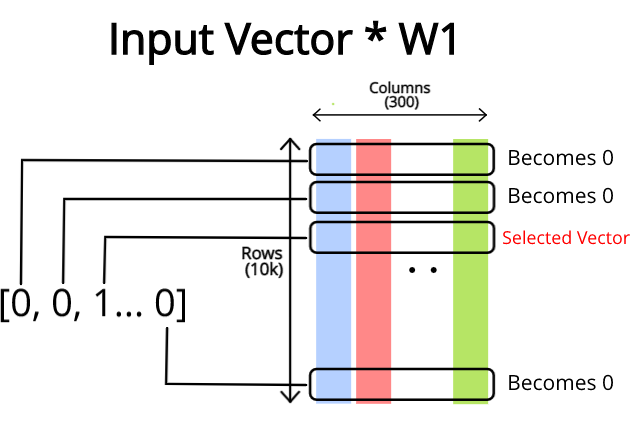

**Model training using embedding layer and RNN (Baseline)**

*Baseline model 1 with SimpleRNN and embedding layer*

*basline model using embedding layers and simpleRNN*

In [37]:
model = Sequential()
model.add(Embedding(total_words, 70, input_length=maxlen))
model.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.20, activation='tanh', return_sequences=True)))
model.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.30, activation='tanh', return_sequences=True)))
model.add(SimpleRNN(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(41, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 130, 70)           12672170  
                                                                 
 bidirectional_4 (Bidirectio  (None, 130, 128)         17280     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 130, 128)         24704     
 nal)                                                            
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 32)                5152      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 41)               

**What are the Recurrent Neural Networks??**

- A major difference between densely connected neural network and recurrent nueral network, is that fully connected networks have no memory in units of each layer. while recurrent nueral networks do store state of previous timestep or sequence while assigning weights to current input.

- In RNNs, we process inputs word by word or eye saccade but eye saccade - while keeping memories of what came before in each cells. this gives fluid representation of sequences and gives nueral network a ability to capture context of sequence rather than absolute representation of words.

- "Recurrent nueral network processes sequences by iterating through the sequence elements and maintaining a a state containing information relative to what it has seen so far. In effect, an RNN is a type of nueral network that has an internal loop."

-6.2 Understanding recurrent nueral network, Deep learning using python by chollat

- See the below depiction of how RNNs learns the context of sequences.

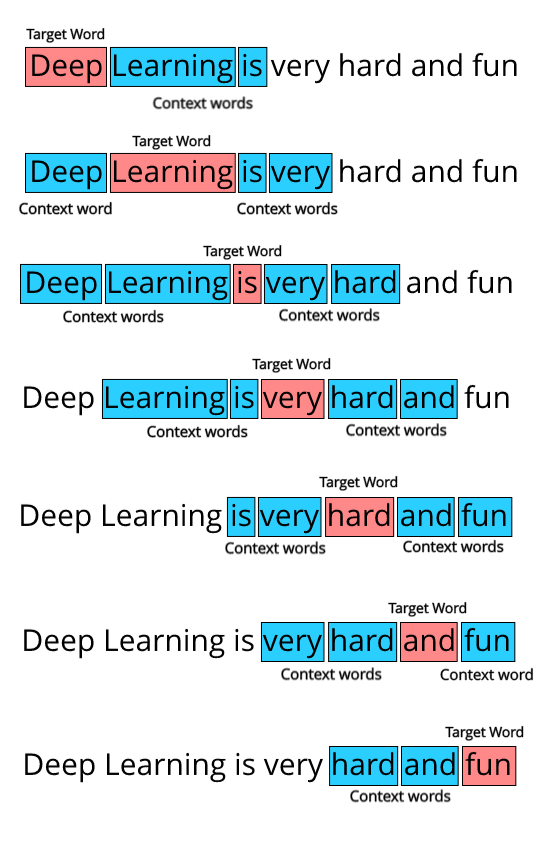

- A visual dipiction of RNN cell with a loop and unrolled RNN cell.
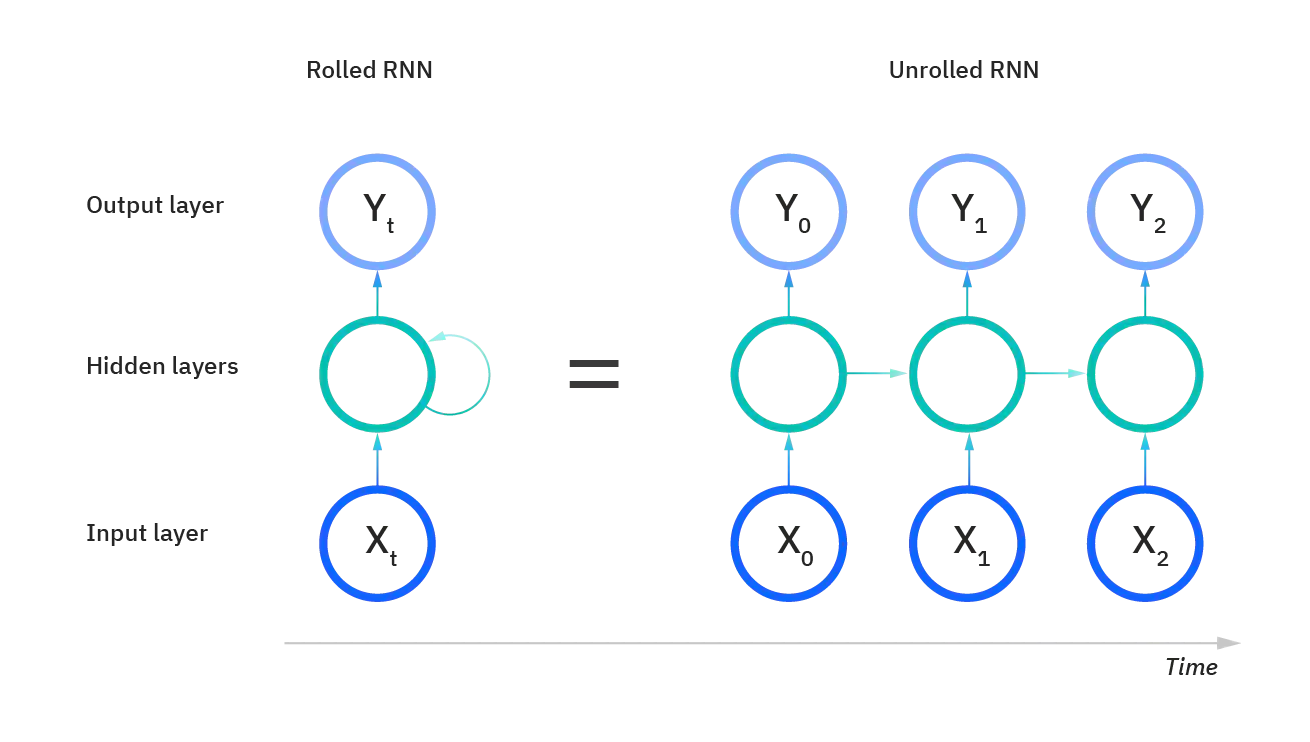


In [38]:
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )

# Set up early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='accuracy',
                               patience=5,
                               verbose=1,
                               mode='min'
                              )

checkpoint = ModelCheckpoint(filepath='best_model.h5',
                             monitor='val_loss',
                             verbose=0,
                             save_best_only=True
                            )

callback_list = [checkpoint, early_stopping]

# Fit the model to the data
history = model.fit(train_padseq, y_train, 
                    batch_size=128, 
                    epochs=15, 
                    validation_split=0.2,
                    callbacks=callback_list
                   )

# Evaluate the model
test_loss, test_acc = model.evaluate(test_padseq, y_test, verbose=0)
print("Test loss and accuracy:", test_loss, test_acc)


Epoch 1/15


ValueError: in user code:

    File "C:\Users\Neeta Devke\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Neeta Devke\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Neeta Devke\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Neeta Devke\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Neeta Devke\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Neeta Devke\AppData\Roaming\Python\Python310\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 130), found shape=(None, 20)


**Notes:**

- Experiment 1: Parameters: max_words=100000, output_dim=50, maxlen=50, epoch=10. Model is highly overfitting as training accuracy comes around 84% while test accuracy is barely 40%.

- Experiment 2: Params: max_words=150000, out_dim=50, maxlen=80, epoch=10, added droput layers in RNN Model do not overfit but underfit and biased. val_acc comes again almost 39.3% while train accuracy is only 42%. model needs more parameters with more epochs

- Experiment 3: Params: max_words=total_words, out_dim=70, maxlen=100, epoch=15, addding bidirection layer over both dropout RNN an improvement in train accuracy to 63% and val_accuracy to 49% max at epoch 13. after epoch 13 model started overfitting. (next step) model can be more complex with regularization, model is forgetting information after 3rd RNN layer due to lower number of units, this needs to be solved.